In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
ds = pd.read_csv('AB_NYC_2019.csv')

In [3]:
columns = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
           'calculated_host_listings_count', 'availability_365']

In [4]:
neighbourhood_group = pd.get_dummies(ds.neighbourhood_group, drop_first=True, prefix='neigh_group')

In [5]:
neighbourhood = pd.get_dummies(ds.neighbourhood, drop_first=True, prefix='neigh')

In [6]:
room_type = pd.get_dummies(ds.room_type, drop_first=True, prefix='room')

In [7]:
ds_dummies = pd.concat([ds[columns], neighbourhood_group, neighbourhood, room_type], axis=1)

### search distance to center

In [8]:
from sklearn.metrics.pairwise import euclidean_distances

In [9]:
# center coordinates

coordinate_center = [40.773659, -73.974890]

In [10]:
coordinates = ds[['latitude', 'longitude']].values

In [11]:
distace_to_center = euclidean_distances(coordinates, [coordinate_center])

In [12]:
ds_dummies['dist_to_center'] = distace_to_center

In [13]:
price = ds_dummies.price

In [14]:
ds_dummies.price = np.log(price)

In [15]:
ds_dummies = ds_dummies.drop(['latitude', 'longitude'], axis=1)

### cut to min - max

In [16]:
Q1 = ds_dummies.price.quantile(0.25)
Q3 = ds_dummies.price.quantile(0.75)
IQR = Q3 - Q1

In [17]:
ds_dummies = ds_dummies[((ds_dummies.price > (Q1 - 1.5 * IQR)) & (ds_dummies.price < (Q3 + 1.5 * IQR)))]

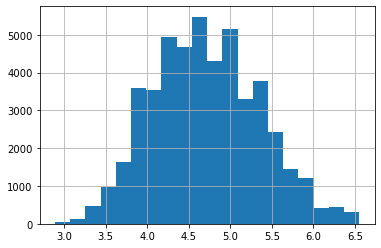

In [18]:
ds_dummies.price.hist(bins=20);

### train test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(ds_dummies.drop(['price'], axis=1), ds_dummies.price, 
                                                    test_size=0.3, random_state=42)

### Scale

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train.columns

Index(['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'neigh_group_Brooklyn', 'neigh_group_Manhattan',
       'neigh_group_Queens', 'neigh_group_Staten Island',
       'neigh_Arden Heights', 'neigh_Arrochar',
       ...
       'neigh_Williamsburg', 'neigh_Willowbrook', 'neigh_Windsor Terrace',
       'neigh_Woodhaven', 'neigh_Woodlawn', 'neigh_Woodrow', 'neigh_Woodside',
       'room_Private room', 'room_Shared room', 'dist_to_center'],
      dtype='object', length=231)

In [24]:
columns_to_scaled = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 
                     'availability_365', 'dist_to_center']

In [25]:
X_train.describe()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neigh_group_Brooklyn,neigh_group_Manhattan,neigh_group_Queens,neigh_group_Staten Island,neigh_Arden Heights,neigh_Arrochar,...,neigh_Williamsburg,neigh_Willowbrook,neigh_Windsor Terrace,neigh_Woodhaven,neigh_Woodlawn,neigh_Woodrow,neigh_Woodside,room_Private room,room_Shared room,dist_to_center
count,33780.000000,33780.000000,33780.000000,33780.000000,33780.000000,33780.000000,33780.000000,33780.000000,33780.000000,33780.000000,...,33780.000000,33780.0,33780.000000,33780.000000,33780.000000,33780.000000,33780.000000,33780.000000,33780.000000,33780.000000
mean,6.841622,23.299615,7.121758,111.813529,0.412285,0.439994,0.118206,0.007519,0.000089,0.000533,...,0.080403,0.0,0.003049,0.001717,0.000266,0.000030,0.004737,0.459621,0.024304,0.074824
std,19.593752,44.384363,32.846228,131.363475,0.492253,0.496394,0.322857,0.086388,0.009424,0.023078,...,0.271920,0.0,0.055136,0.041402,0.016321,0.005441,0.068660,0.498374,0.153995,0.045686
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002618
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043286
50%,2.000000,5.000000,1.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065266
75%,5.000000,24.000000,2.000000,224.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.098414
max,1250.000000,629.000000,327.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.381751


In [26]:
scaler.fit(X_train[columns_to_scaled])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
X_train[columns_to_scaled] = scaler.transform(X_train[columns_to_scaled])
X_test[columns_to_scaled] = scaler.transform(X_test[columns_to_scaled])

### metrics

In [28]:
from sklearn import metrics

In [29]:
def mape(y, y_predict):
    y, y_predict = np.array(y), np.array(y_predict)
    return np.mean(abs((y - y_predict) / y)) * 100

In [30]:
def print_metrics(y, y_predict):
    y = np.exp(y)
    y_predict = np.exp(y_predict)
    # y_predict = y_predict.replace(np.inf, max(y))
    
    print('MAE:  ', metrics.mean_absolute_error(y, y_predict))
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y, y_predict)))
    print('MAPE: ', mape(y, y_predict))

### Models

In [31]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, LarsCV
from sklearn.model_selection import GridSearchCV

In [32]:
model_LR = LinearRegression()

In [33]:
model_LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_predict_LR = model_LR.predict(X_test)

In [35]:
y_test.shape, y_predict_LR.shape

((14478,), (14478,))

In [36]:
print_metrics(y=y_test, y_predict=y_predict_LR)

MAE:   44.89253700101144
RMSE:  76.99310730548062
MAPE:  32.442319975461245


In [37]:
alphas = np.linspace(0.00001, 0.5, 20)
params = {'alpha': alphas}

In [38]:
model = ElasticNet()

In [39]:
grid_cv = GridSearchCV(estimator=model, param_grid=params, cv=3)

In [40]:
%%time
grid_cv.fit(X_train, y_train)

CPU times: user 2min 21s, sys: 2.53 s, total: 2min 24s
Wall time: 36.1 s


GridSearchCV(cv=3, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-05, 2.63252632e-02, 5.26405263e-02, 7.89557895e-02,
       1.05271053e-01, 1.31586316e-01, 1.57901579e-01, 1.84216842e-01,
       2.10532105e-01, 2.36847368e-01, 2.63162632e-01, 2.89477895e-01,
       3.15793158e-01, 3.42108421e-01, 3.68423684e-01, 3.94738947e-01,
       4.21054211e-01, 4.47369474e-01, 4.73684737e-01, 5.00000000e-01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
y_predict_grid = grid_cv.best_estimator_.predict(X_test)

In [42]:
print_metrics(y=y_test, y_predict=y_predict_grid)

MAE:   44.872718049569016
RMSE:  76.96029353927894
MAPE:  32.42474714918352


In [43]:
model = Lasso()

#### LassoCV

In [44]:
model_lasso_CV = LarsCV(cv=5)

In [45]:
model_lasso_CV.fit(X_train, y_train)

LarsCV(copy_X=True, cv=5, eps=2.220446049250313e-16, fit_intercept=True,
       max_iter=500, max_n_alphas=1000, n_jobs=None, normalize=True,
       precompute='auto', verbose=False)

In [46]:
y_predict_lasso_cv = model_lasso_CV.predict(X_test)

In [47]:
print_metrics(y=y_test, y_predict=y_predict_lasso_cv)

MAE:   44.95634307982454
RMSE:  77.37924133465073
MAPE:  32.594804259612125
